In [26]:
# pip install seaborn

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.stem import WordNetLemmatizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [28]:

df = pd.read_csv("US-Economic-News.csv", encoding='latin1')
data = df[df.relevance != "not sure"]
data.shape

(7991, 15)

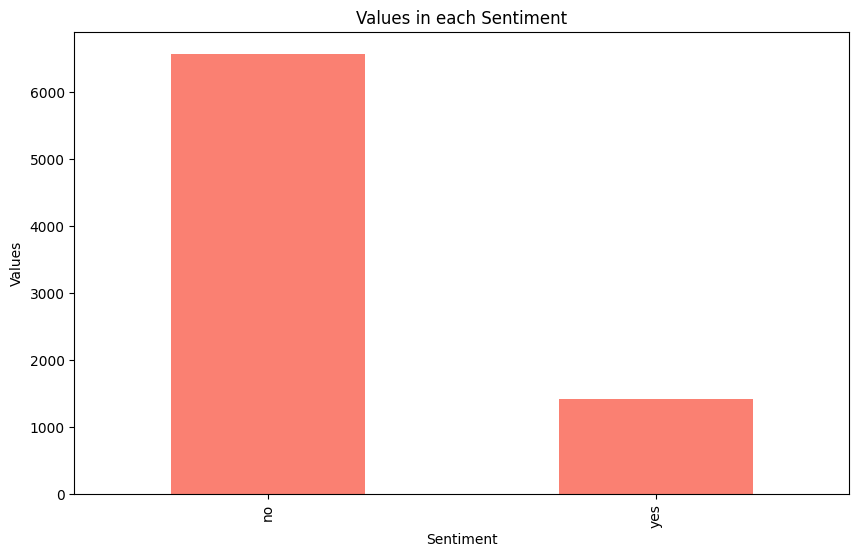

In [29]:
plt.figure(figsize=(10, 6))
data['relevance'].value_counts().plot(kind='bar', color='salmon')
plt.title("Values in each Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Values")
plt.show()

In [30]:
data['relevance'] = data.relevance.map({'yes':1, 'no':0}) # relevant is 

C:\Users\SIVERMA\AppData\Local\Temp\ipykernel_2876\3932894198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['relevance'] = data.relevance.map({'yes':1, 'no':0}) # relevant is


In [13]:
# corpus = df['text'].to_list()
X_train,X_test = train_test_split(df['text'],train_size=.8)

In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    """
    Function to clean and preprocess text data.
    
    Parameters:
    text (str): The text to clean.
    
    Returns:
    str: The cleaned text.
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word not in stop_words])
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    
    return text



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
docs = data['text'].tolist()
tfidf_vectorizer = TfidfVectorizer(preprocessor=clean_text) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [37]:
X = docs 
y = data['relevance']
print(X.shape, y.shape)

(7991, 66443) (7991,)


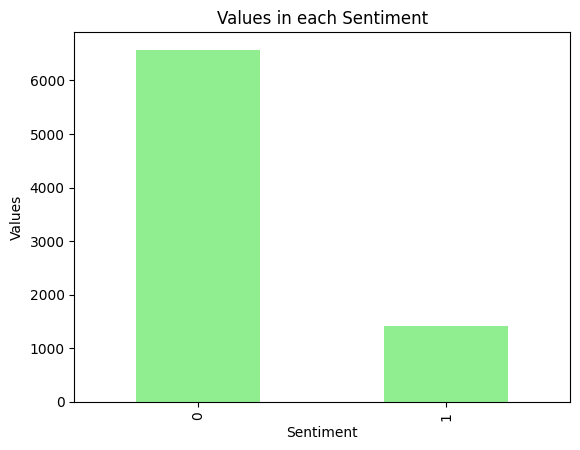

In [38]:
y.value_counts().plot(kind='bar',color="lightgreen")
plt.title("Values in each Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Values")
plt.show()

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6392, 66443) (6392,)
(1599, 66443) (1599,)


# GaussianNB

In [42]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

In [44]:
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.9993742177722152
Testing Accuracy score: 0.7942464040025016


In [45]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant'])
print(report)

              precision    recall  f1-score   support

not relevant       0.83      0.94      0.88      1315
    relevant       0.29      0.11      0.15       284

    accuracy                           0.79      1599
   macro avg       0.56      0.52      0.52      1599
weighted avg       0.73      0.79      0.75      1599



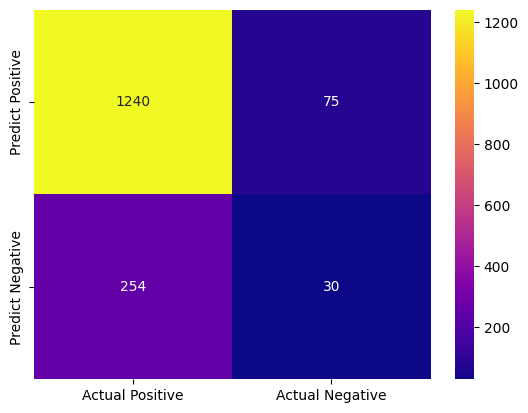

In [56]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='plasma')
plt.show()

# MultinomialNB

In [57]:
mnb = MultinomialNB() 
mnb.fit(X_train, y_train)

MultinomialNB()

In [58]:
y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)

In [59]:
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.8221214017521903
Testing Accuracy score: 0.8217636022514071


In [60]:
result = classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant'])
print(result)

              precision    recall  f1-score   support

not relevant       0.82      1.00      0.90      1315
    relevant       0.00      0.00      0.00       284

    accuracy                           0.82      1599
   macro avg       0.41      0.50      0.45      1599
weighted avg       0.68      0.82      0.74      1599



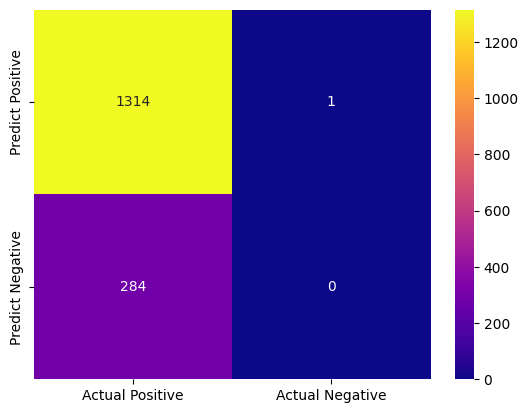

In [61]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='plasma')
plt.show()

# <span style="color:yellow">Discriminative Classifier </span>
 <span style="color:yellow">It directly models 𝑃(𝑌∣𝑋) using a logistic function and optimizes the parameters to maximize the likelihood of the observed data </span>

# LogisticRegression

In [62]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [63]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [64]:
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.8520025031289111
Testing Accuracy score: 0.8242651657285803


In [65]:
results = classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant'])
print(results)

              precision    recall  f1-score   support

not relevant       0.83      0.98      0.90      1315
    relevant       0.53      0.09      0.15       284

    accuracy                           0.82      1599
   macro avg       0.68      0.54      0.53      1599
weighted avg       0.78      0.82      0.77      1599



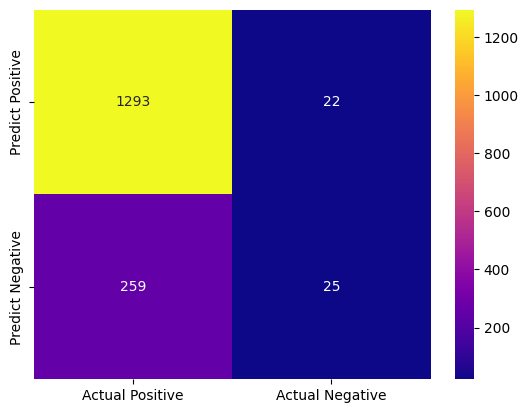

In [67]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='plasma')
plt.show()

#  LinearSVC

In [100]:
svc =  LinearSVC() 
svc.fit(X_train, y_train)

LinearSVC()

In [101]:
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [102]:
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.9360137672090113
Testing Accuracy score: 0.7967479674796748


In [71]:
repo = classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant'])
print(repo)

              precision    recall  f1-score   support

not relevant       0.86      0.86      0.86      1315
    relevant       0.35      0.34      0.34       284

    accuracy                           0.77      1599
   macro avg       0.60      0.60      0.60      1599
weighted avg       0.77      0.77      0.77      1599



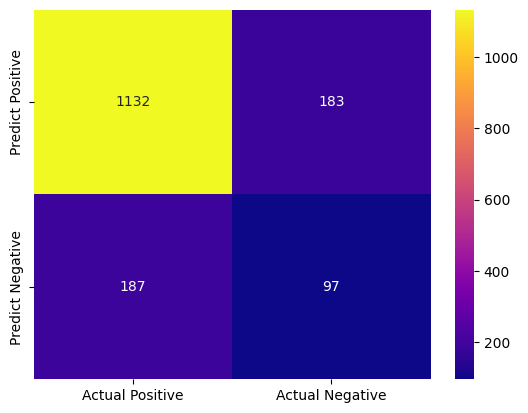

In [72]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='plasma')
plt.show()

# DecisionTreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [75]:

print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 1.0
Testing Accuracy score: 0.7661038148843027


In [76]:
repor = classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant'])
print(repor)

              precision    recall  f1-score   support

not relevant       0.85      0.87      0.86      1315
    relevant       0.31      0.27      0.29       284

    accuracy                           0.77      1599
   macro avg       0.58      0.57      0.57      1599
weighted avg       0.75      0.77      0.76      1599



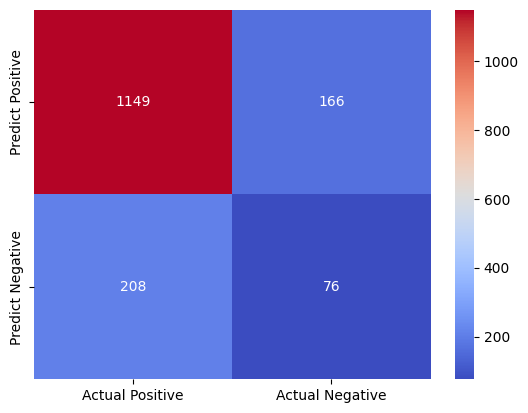

In [77]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.show()

# Ensembling

In [78]:
from sklearn.ensemble import VotingClassifier
classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', gnb)
              ]

In [79]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('Logistic Regression',
                              LogisticRegression(random_state=42)),
                             ('Naive Bayes', GaussianNB())])

In [80]:
y_pred_train=vc.predict(X_train)
y_pred_test = vc.predict(X_test)

In [81]:
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.9998435544430538
Testing Accuracy score: 0.8167604752970606


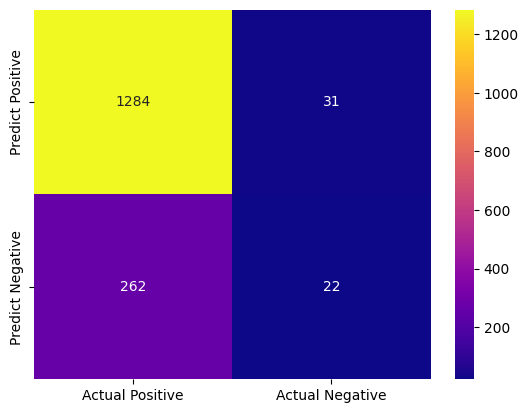

In [82]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='plasma')
plt.show()

# <span style="color:yellow">OPTIMIZATION </span>

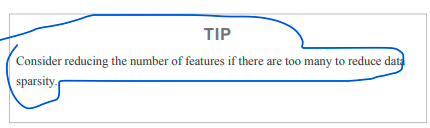      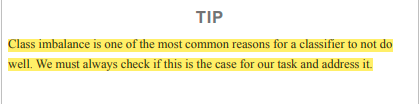

In [86]:
docs = data['text'].tolist()
tfidf_vectorizer = TfidfVectorizer(preprocessor=clean_text,max_features=5000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [88]:
X = docs 
y = data['relevance']
print(X.shape, y.shape)

(7991, 5000) (7991,)


In [89]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6392, 5000) (6392,)
(1599, 5000) (1599,)


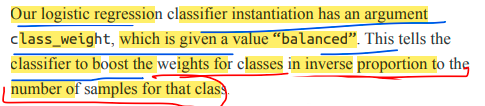

# svc

In [103]:
svc =  LinearSVC(class_weight='balanced') 
svc.fit(X_train, y_train)

LinearSVC(class_weight='balanced')

In [104]:
y_pred_train=svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [105]:
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.9258448060075094
Testing Accuracy score: 0.7323327079424641


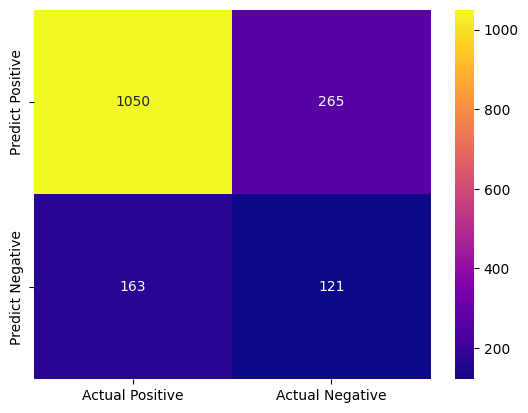

In [106]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='plasma')
plt.show()

LR

In [107]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [108]:
y_pred_train=lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [109]:
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.818523153942428
Testing Accuracy score: 0.7354596622889306


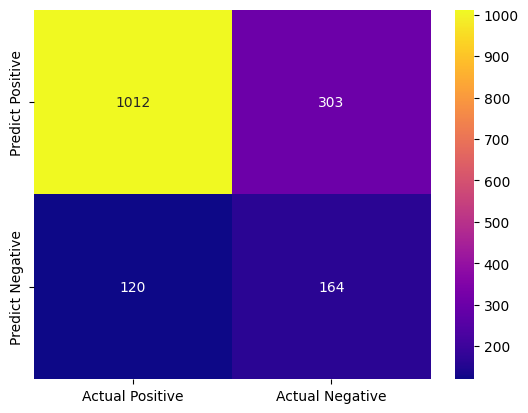

In [110]:
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='plasma')
plt.show()

# <span style="color:yellow">EMEDDING MODELS </span>
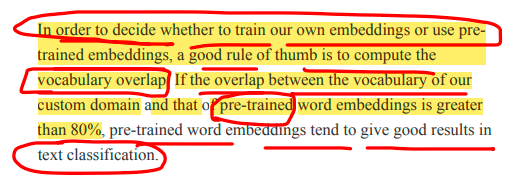

In [111]:
train_file = 'DBPEDIA/DBPEDIA_train.csv'
df = pd.read_csv(train_file)
df.rename(columns = {'text':'Texts','l1':'class', 'l2':'profession','l3':'Type'}, inplace = True)

test_file = 'DBPEDIA/DBPEDIA_test.csv'
df_test = pd.read_csv(test_file)
df_test.rename(columns = {'text':'Texts','l1':'class', 'l2':'profession','l3':'Type'}, inplace = True)

print("Train:{}  Test:{}".format(df.shape, df_test.shape))

Train:(240942, 4)  Test:(60794, 4)


In [126]:
df.columns

Index(['Texts', 'class', 'profession', 'Type'], dtype='object')

In [128]:
df['class'].value_counts()

class
Agent             124798
Place              45877
Species            21472
Work               21013
Event              19106
SportsSeason        5883
UnitOfWork          1761
TopicalConcept       784
Device               248
Name: count, dtype: int64

In [129]:
df['profession'].unique()

array(['Politician', 'MusicalWork', 'NaturalPlace',
       'PeriodicalLiterature', 'Building', 'Animal', 'Organisation',
       'Person', 'Athlete', 'Settlement', 'LegalCase', 'MotorcycleRider',
       'Company', 'RouteOfTransportation', 'SocietalEvent',
       'WinterSportPlayer', 'ClericalAdministrativeRegion',
       'EducationalInstitution', 'BodyOfWater', 'Plant', 'Infrastructure',
       'FootballLeagueSeason', 'Actor', 'SportsManager', 'Cleric',
       'Boxer', 'Cartoon', 'Venue', 'Artist', 'Tournament', 'Coach',
       'ComicsCharacter', 'Olympics', 'SportsTeamSeason', 'Software',
       'Group', 'Broadcaster', 'Tower', 'Race', 'SportFacility',
       'SportsTeam', 'SportsEvent', 'Eukaryote', 'Scientist',
       'CelestialBody', 'Engine', 'BritishRoyalty', 'Satellite', 'Comic',
       'WrittenWork', 'FictionalCharacter', 'Presenter', 'Horse',
       'NaturalEvent', 'AmusementParkAttraction', 'Writer', 'Song',
       'RaceTrack', 'SportsLeague', 'Genre', 'GridironFootballPlayer'

In [130]:
professions = {}
i = 0
for Name in df['profession'].unique():
    professions[Name] = i
    i +=1
    
# Mapping the classes
df['Class'] = df['profession'].map(professions)
df_test['Class'] = df_test['profession'].map(professions)

In [131]:
df.head()

,Texts,class,profession,Type,Class
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator,0
1,Lions is the sixth studio album by American ro...,Work,MusicalWork,Album,1
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain,2
3,Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal,3
4,The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding,4


In [132]:
df.drop('class', axis = 1, inplace = True)
df_test.drop('class', axis = 1, inplace = True)
df.head()

,Texts,profession,Type,Class
0,"William Alexander Massey (October 7, 1856 – Ma...",Politician,Senator,0
1,Lions is the sixth studio album by American ro...,MusicalWork,Album,1
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",NaturalPlace,Mountain,2
3,Cancer Prevention Research is a biweekly peer-...,PeriodicalLiterature,AcademicJournal,3
4,The Princeton University Chapel is located on ...,Building,HistoricBuilding,4


# Normalized
1.  Original: "é" (a single character with an accent)
2.  NFKD Normalized: "e" + "´" (two characters: base character "e" and combining accent "´")

In [162]:
# import unicodedata
# normalized = unicodedata.normalize('NFKD', "Café München")
# ascii_encoded = normalized.encode('ascii', 'ignore')
# ascii_encoded.decode('utf-8')

In [163]:
import unicodedata
def clean_it(text,normalize=True):
    
    s = str(text).replace(',',' ').replace('"','').replace('\' ',' \' ').replace('.',' . ').replace('(',' ( ').\
            replace(')',' ) ').replace('!',' ! ').replace('?',' ? ').replace(':',' ').replace(';',' ').lower()
    
    if normalize:
        s = unicodedata.normalize('NFKD',s).encode('ascii','ignore').decode('utf-8')
    
    return s

In [164]:
'__class__' + df['Class'].iloc[0].astype(str) + ' '

'__class__0 '

In [165]:
def clean_df(data, cleanit= False, shuffleit=False, encodeit=False, label_prefix='__class__'):
    df = data[['Type','Texts']].copy(deep=True)
    df['Class'] = label_prefix + data['Class'].astype(str) + ' '
    
    if cleanit:
        df['Type'] = df['Type'].apply(lambda x: clean_it(x,encodeit))
        df['Texts'] = df['Texts'].apply(lambda x: clean_it(x,encodeit))
    
    if shuffleit:
        df.sample(frac=1).reset_index(drop=True)
            
    return df

In [136]:
df_train_cleaned = clean_df(df, True, True)
df_test_cleaned = clean_df(df_test, True, True)

In [167]:
df_train_cleaned.head()

,Type,Texts,Class
0,senator,william alexander massey ( october 7 1856 – ...,__class__0
1,album,lions is the sixth studio album by american ro...,__class__1
2,mountain,pirqa ( aymara and quechua for wall hispanic...,__class__2
3,academicjournal,cancer prevention research is a biweekly peer-...,__class__3
4,historicbuilding,the princeton university chapel is located on ...,__class__4


In [ ]:
%%time
## Using fastText for feature extraction and training
from fasttext import train_supervised 
"""
fastText expects and training file (csv), a model name as input arguments.
label_prefix refers to the prefix before label string in the dataset.
default is __label__. In our dataset, it is __class__. 
There are several other parameters which can be seen in: 
https://pypi.org/project/fasttext/
"""
model = train_supervised(input=train_file, label="__class__", lr=1.0, epoch=75, loss='ova', wordNgrams=2, dim=200, thread=2, verbose=100)

In [ ]:
# Save the model
model.save_model("FastText.bin")

# Load the model
FastText = fasttext.load_model("FastText.bin")

In [ ]:
print('Number of words :',len(FastText.words))
print('Label :',len(FastText.labels))

Number of words : 753758
Label : 70

In [ ]:
for k in range(1,6):
    results = FastText.test(test_file,k=k)
    print(f"Test Samples: {results[0]} Precision@{k} : {results[1]*100:2.4f} Recall@{k} : {results[2]*100:2.4f}")

# Test Samples: 60794 Precision@1 : 96.6378 Recall@1 : 96.6378
# Test Samples: 60794 Precision@2 : 49.2022 Recall@2 : 98.4044
# Test Samples: 60794 Precision@3 : 32.8629 Recall@3 : 98.5887
# Test Samples: 60794 Precision@4 : 24.6554 Recall@4 : 98.6216
# Test Samples: 60794 Precision@5 : 19.8154 Recall@5 : 99.0772

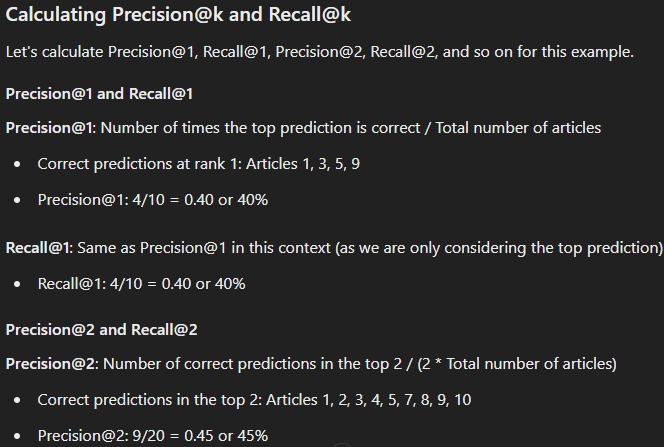

In [ ]:
print('Text :',df_test_cleaned['Texts'].iloc[120])
print('Actual :',df_test_cleaned['Class'].iloc[120])
print('Prediction :',FastText.predict(df_test_cleaned['Texts'].iloc[120]))

# Text : the moko skink  oligosoma moco  ( also known as leiolopisma moco )   is a species of skink in the family scincidae . 
# Actual : __class__5 
# Prediction : (('__class__5',), array([1.00001001]))

In [ ]:
print('Text :',df_test_cleaned['Texts'].iloc[10])
print('Actual :',df_test_cleaned['Class'].iloc[10])
print('Prediction :',FastText.predict(df_test_cleaned['Texts'].iloc[10]))

# Text : royal rumble  ( 2004 )  was the seventeenth annual royal rumble professional wrestling pay-per-view event produced by world wrestling entertainment  
# ( wwe )  .  it was presented by sony's playstation 2  took place on january 25  2004  at the wachovia center in philadelphia  pennsylvania and featured 
# talent from the raw and smackdown !  brands .  as has been customary since 1993  the royal rumble match winner received a match at that year's wrestlemania
#  in this instance wrestlemania xx .  beginning with this royal rumble  the winner could challenge at wrestlemania his choice of either the wwe championship 
# or the world heavyweight championship .  six professional wrestling matches were featured on the event's supercard  a scheduling of more than one main event
#  .  the main event was the annual 30-man royal rumble match  which featured wrestlers from both brands .  chris benoit  the first entrant  won the match by
#  last eliminating the big show  the twenty-fourth entrant .  this win resulted in benoit breaking the longevity record last held by bob backlund  staying
#  in the match for over one hour .  the primary match on the raw brand was a last man standing match between triple h and shawn michaels for the world 
# heavyweight championship  which ended in a draw .  the predominant match on the smackdown !  brand was brock lesnar versus hardcore holly for the wwe 
# championship  which lesnar won to retain the championship .  the featured match on the undercard was a tables match for the world tag team championship 
# between evolution  ( ric flair and batista )  and the dudley boyz  ( bubba ray and d-von )   which evolution won to retain the titles . 


# Actual : __class__41 
# Prediction : (('__class__41',), array([1.00001001]))

# BERT

In [172]:
import spacy
from gensim.parsing.preprocessing import remove_stopwords
from nltk.corpus  import stopwords
import re
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import datetime
import numpy as np
import pandas as pd
from transformers import *

c:\Users\SIVERMA\Documents\Experimenting\________DEEPLEARNING\CLASSIFICATION___CIFAR\DLENV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\SIVERMA\Documents\Experimenting\________DEEPLEARNING\CLASSIFICATION___CIFAR\DLENV\Lib\site-packages\transformers\deepspeed.py:24: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


In [173]:
df_train=pd.read_csv('DBPEDIA//DBPEDIA_train.csv',encoding='utf-8-sig')
df_val=pd.read_csv('DBPEDIA//DBPEDIA_val.csv',encoding='utf-8-sig')
df_test=pd.read_csv('DBPEDIA//DBPEDIA_test.csv',encoding='utf-8-sig')

In [174]:
df_train=df_train.dropna(axis=0)
df_val=df_val.dropna(axis=0)
df_test=df_test.dropna(axis=0)

In [175]:
def cleaning(df):
    #df.loc[:,'SentimentText']=pd.DataFrame(df.loc[:,'SentimentText'].str.lower())
    df.loc[:,'text'] = [re.sub(r'\d+','', i) for i in df.loc[:,'text']]
    df.loc[:,'text'] = [re.sub(r'[^a-zA-Z]',' ', i) for i in df.loc[:,'text']]
    df.loc[:,'text'] = [re.sub(r"\b[a-zA-Z]\b", ' ', i) for i in df.loc[:,'text']]
    
    #df.loc[:,'text'] = [re.sub(r"[#|\.|_|\^|\$|\&|=|;|,|‐|-|–|(|)|//|\\+|\|*|\']+",'', i) for i in df.loc[:,'text']]
    df.loc[:,'text'] = [re.sub(' +',' ', i) for i in df.loc[:,'text']]
    return(df)

In [176]:
df_train=cleaning(df_train)
df_val=cleaning(df_val)
df_test=cleaning(df_test)

In [177]:
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(df_train['l3'])
encoded_Y = encoder.transform(df_train['l3'])

In [178]:
import pandas as pd
import torch
import transformers
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertModel, DistilBertTokenizer,DistilBertForMaskedLM

In [179]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [180]:
MAX_LEN = 512
TRAIN_BATCH_SIZE = 4
VALID_BATCH_SIZE = 2
EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

c:\Users\SIVERMA\Documents\Experimenting\________DEEPLEARNING\CLASSIFICATION___CIFAR\DLENV\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\SIVERMA\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
loading file vocab.txt from cache at C:\Users\SIV

In [183]:
df_train['encoded_l3']=encoded_Y
df_val['encoded_l3']=encoder.transform(df_val['l3'])
df_test['encoded_l3']=encoder.transform(df_test['l3'])

In [184]:
df_data=df_train.iloc[:,[0,4]]

In [185]:
class Triage(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __getitem__(self, index):
        text = str(self.data.text[index])
        text = " ".join(text.split())
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'targets': torch.tensor(self.data.encoded_l3[index], dtype=torch.long)
        } 
    
    def __len__(self):
        return self.len

In [186]:
training_set = Triage(df_train, tokenizer, MAX_LEN)
testing_set = Triage(df_test, tokenizer, MAX_LEN)

In [187]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [188]:
class DistillBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistillBERTClass, self).__init__()
        self.l1 = transformers.DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.l2 = torch.nn.Dropout(0.2)
        self.l3 = torch.nn.Linear(768, 1)
    
    def forward(self, ids, mask):
        output_1= self.l1(ids, mask)
        output_2 = self.l2(output_1[0])
        output = self.l3(output_2)
        return output

In [ ]:
model = DistillBERTClass()
model.to(device)

In [192]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [193]:
def train(epoch):
    model.train()
    for _,data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask).squeeze()

        optimizer.zero_grad()
        loss = loss_function(outputs, targets)
        if _%10000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
for epoch in range(EPOCHS):
    train(epoch)

In [ ]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask).squeeze()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            total+=targets.size(0)
            n_correct+=(big_idx==targets).sum().item()
    return (n_correct*100.0)/total

In [ ]:
print('This is the validation section to print the accuracy and see how it performs')
print('Here we are leveraging on the dataloader crearted for the validation dataset, the approcah is using more of pytorch')

acc = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

# <span style="color:yellow"> TWEET CLASSIFICATION </span>
<a>https://www.kaggle.com/datasets/manuelbenedicto/figure-eight-labelled-textual-dataset</a>

In [197]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [198]:
df = pd.read_csv("text_emotion.csv")
print(df.shape)
df.head()

(40000, 4)


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [201]:
df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [202]:
tweeter = TweetTokenizer(strip_handles=True,preserve_case=False)
mystopwords = set(stopwords.words("english"))

In [204]:

def preprocess_corpus(texts):
    def remove_stops_digits(tokens):
        return [token for token in tokens if token not in mystopwords and not token.isdigit()]
    return [remove_stops_digits(tweeter.tokenize(content)) for content in texts]


In [205]:
shortlist = ['neutral', "happiness", "worry"]
df_subset = df[df['sentiment'].isin(shortlist)]
df_subset.shape

(22306, 4)

In [206]:
#df_subset contains only the three categories we chose. 
mydata = preprocess_corpus(df_subset['content'])
mycats = df_subset['sentiment']
print(len(mydata), len(mycats))

22306 22306


In [207]:
train_data, test_data, train_cats, test_cats = train_test_split(mydata,mycats,random_state=1234)

In [208]:
train_doc2vec = [TaggedDocument((d), tags=[str(i)]) for i, d in enumerate(train_data)]

In [209]:
model = Doc2Vec(vector_size=50, alpha=0.025, min_count=5, dm =1, epochs=100)

In [210]:
model.build_vocab(train_doc2vec)
model.train(train_doc2vec, total_examples=model.corpus_count, epochs=model.epochs)

1.  min_count is the minimum frequency of words that remain in vocabulary; 
2.  dm, which stands for distributed memory, is one of the representation learners implemented in Doc2vec (the other is dbow, or distributed bag of words);

In [211]:
model.save("d2v.model")
print("Model Saved")

Model Saved


In [213]:
model= Doc2Vec.load("d2v.model")

train_vectors =  [model.infer_vector(list_of_tokens) for list_of_tokens in train_data]
test_vectors = [model.infer_vector(list_of_tokens) for list_of_tokens in test_data]

In [216]:
train_vectors[0]

array([ 0.38632637,  0.5448597 , -0.04279906, -0.0179188 , -0.428874  ,
       -0.6456777 ,  0.5880025 ,  0.961414  , -0.25235054,  0.32380587,
       -0.54378265, -0.15908113, -0.2265348 , -0.53354645, -1.0015926 ,
       -0.08786235, -1.0647631 , -0.4779614 , -0.83860713, -0.01202572,
       -0.33708635,  0.8553427 ,  0.38903126,  2.0923047 , -0.88770276,
        0.02553086,  0.7557995 ,  1.9411582 , -1.7659519 , -0.7062633 ,
       -0.09372672, -0.82850474,  1.2834456 , -0.05227116, -0.25655416,
        0.413072  , -0.02628145, -0.68928117, -1.2707672 , -0.04552689,
        1.4446664 ,  0.35470036,  0.8746574 ,  0.44678023,  0.39218232,
        1.4109955 , -1.569107  , -0.30116385,  1.1967019 , -1.0397332 ],
      dtype=float32)

# LR

In [218]:
from sklearn.linear_model import LogisticRegression

myclass = LogisticRegression(class_weight="balanced") 
myclass.fit(train_vectors, train_cats)

LogisticRegression(class_weight='balanced')

In [220]:
preds = myclass.predict(test_vectors)

In [221]:
print(classification_report(test_cats, preds))

              precision    recall  f1-score   support

   happiness       0.48      0.54      0.51      1331
     neutral       0.47      0.57      0.52      2143
       worry       0.56      0.40      0.47      2103

    accuracy                           0.50      5577
   macro avg       0.51      0.50      0.50      5577
weighted avg       0.51      0.50      0.50      5577



In [223]:
print("Testing Accuracy score:",accuracy_score(test_cats, preds))

Testing Accuracy score: 0.49919311457772997


# <span style="color:yellow">USING DEEP-LEARNING</span>

In [294]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from collections import Counter
from torch.nn.utils.rnn import pad_sequence
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
MAX_NUM_WORDS = 5000 #vocab size


In [295]:
def preprocess_corpus(texts):
    def remove_stops_digits(tokens):
        return [token for token in tokens if token not in mystopwords and not token.isdigit()]
    return [" ".join(remove_stops_digits(tweeter.tokenize(content))) for content in texts]


texts = preprocess_corpus(df_subset['content'])
mycats = encoder.fit_transform(df_subset['sentiment'].tolist())

In [296]:
mycats

array([1, 2, 2, ..., 0, 1, 0], dtype=int64)

In [297]:
texts[0]

'want trade someone houston tickets , one .'

In [298]:

tokenizer = get_tokenizer('basic_english')

def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

In [299]:
vocab = build_vocab_from_iterator(yield_tokens(texts), specials=["<unk>"], max_tokens=MAX_NUM_WORDS)
vocab.set_default_index(vocab["<unk>"])

In [300]:
# vocab.get_stoi()

In [301]:
def texts_to_sequences(texts):
    texts = preprocess_corpus(texts)
    sequences = []
    for text in texts:
        sequences.append([vocab[token] for token in tokenizer(text)])
    return sequences

In [436]:
text_sequences = texts_to_sequences(texts)
_train_sequences,_test_sequences,_y_train,_y_test = train_test_split(text_sequences,torch.Tensor(mycats).long(),test_size=.2)

In [437]:
len(_train_sequences),len(_test_sequences),len(_y_train),len(_y_test)

(17844, 4462, 17844, 4462)

In [438]:
def pad_sequences(sequences, maxlen):
    padded_sequences = pad_sequence([torch.tensor(seq[:maxlen]) for seq in sequences], batch_first=True, padding_value=0)
    if padded_sequences.size(1) < maxlen:
        padding = torch.zeros((padded_sequences.size(0), maxlen - padded_sequences.size(1)), dtype=torch.long)
        padded_sequences = torch.cat([padded_sequences, padding], dim=1)
    return padded_sequences

In [439]:
_max = lambda x:len(x)
len(sorted(_train_sequences,key=_max,reverse=True)[0])

74

In [440]:
MAX_SEQUENCE_LENGTH = 70
_train_sequences = pad_sequences(_train_sequences, MAX_SEQUENCE_LENGTH)
_test_sequences = pad_sequences(_test_sequences, MAX_SEQUENCE_LENGTH)

In [441]:
len(sorted(_train_sequences,key=_max,reverse=True)[0])

70

# USING <SPAN STYLE="COLOR:YELLOW">GLOVE </SPAN> FOR INPUT LAYER FOR DNN

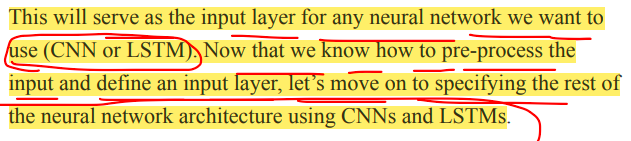

In [374]:
import os
import requests
import zipfile
# Define constants
GLOVE_DIR = os.getcwd()
GLOVE_FILE = 'glove.6B.100d.txt'
glove_zip_path = 'glove.6B.zip'

EMBEDDING_DIM = 100

with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
    zip_ref.extractall(GLOVE_DIR)
print("GloVe embeddings downloaded and extracted.")


GloVe embeddings downloaded and extracted.


In [375]:
embeddings_index = {}
glove_path = os.path.join(GLOVE_DIR, GLOVE_FILE)
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('GloVe embeddings loaded.')

GloVe embeddings loaded.


In [376]:
num_words = min(MAX_NUM_WORDS, len(vocab.get_stoi())) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in vocab.get_stoi().items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [377]:
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

print('Embedding matrix created.')
print('Embedding matrix shape:', embedding_matrix.shape)

Embedding matrix created.
Embedding matrix shape: torch.Size([5001, 100])


In [450]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

class CNNModel(nn.Module):
    def __init__(self, embedding_matrix, num_classes):
        super(CNNModel, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)
        self.conv1 = nn.Conv1d(in_channels=EMBEDDING_DIM, out_channels=128, kernel_size=5)
        self.pool1 = nn.MaxPool1d(2)  
        self.conv2 = nn.Conv1d(128, 128, 5)
        self.pool2 = nn.MaxPool1d(2)  
        self.conv3 = nn.Conv1d(128, 128, 3)  
        self.global_pool = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = torch.relu(self.conv3(x))
        x = self.global_pool(x).squeeze(-1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [451]:
# Create a random input tensor with shape [batch_size, sequence_length]
batch_size = 5
random_input = torch.randint(0, 5001, (batch_size, 70))
# Instantiate the model
model = CNNModel(embedding_matrix, num_classes=3)

# Perform a forward pass
output = model(random_input)

# Print the output
print(output)


tensor([[-0.0444,  0.0437,  0.0028],
        [-0.0402,  0.0425,  0.0091],
        [-0.0369,  0.0512,  0.0071],
        [-0.0369,  0.0498,  0.0139],
        [-0.0313,  0.0399,  0.0142]], grad_fn=<AddmmBackward0>)


In [452]:

# Create the dataset and data loaders
train_data = TensorDataset(torch.Tensor(_train_sequences), torch.Tensor(_y_train))
val_data = TensorDataset(torch.Tensor(_test_sequences), torch.Tensor(_y_test))

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader = DataLoader(val_data, batch_size=128, shuffle=False)

num_classes = 3
model = CNNModel(embedding_matrix, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

In [456]:
num_epochs = 15
for epoch in range(num_epochs):
    # Training phase
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation phase
    model.eval()
    val_loss = 0
    val_correct = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, targets).item()
            preds = outputs.argmax(dim=1)
            val_correct += (preds == targets).sum().item()

    # Average validation loss and accuracy
    val_loss /= len(val_loader)
    val_accuracy = val_correct / len(val_loader.dataset)

    print(f'Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch 1, Validation Loss: 2.6357, Validation Accuracy: 0.5350
Epoch 2, Validation Loss: 2.6619, Validation Accuracy: 0.5314
Epoch 3, Validation Loss: 3.2130, Validation Accuracy: 0.5370
Epoch 4, Validation Loss: 3.2282, Validation Accuracy: 0.5345
Epoch 5, Validation Loss: 2.3144, Validation Accuracy: 0.5273
Epoch 6, Validation Loss: 2.7599, Validation Accuracy: 0.5240
Epoch 7, Validation Loss: 3.2989, Validation Accuracy: 0.5365
Epoch 8, Validation Loss: 2.7408, Validation Accuracy: 0.5372
Epoch 9, Validation Loss: 4.2130, Validation Accuracy: 0.5164
Epoch 10, Validation Loss: 3.4487, Validation Accuracy: 0.5255
Epoch 11, Validation Loss: 3.5382, Validation Accuracy: 0.5399
Epoch 12, Validation Loss: 2.9312, Validation Accuracy: 0.5408
Epoch 13, Validation Loss: 3.7476, Validation Accuracy: 0.5193
Epoch 14, Validation Loss: 3.2928, Validation Accuracy: 0.5354
Epoch 15, Validation Loss: 3.2020, Validation Accuracy: 0.5377


# USING <SPAN STYLE="COLOR:YELLOW">LSTM </SPAN>

In [496]:
import torch.nn.init as init
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, dropout=0.2, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(0.2)
        self._initialize_weights()
        
    def forward(self, x):
        x = self.embedding(x)
        x, (hn, cn) = self.lstm(x)
        x = self.dropout(x[:, -1, :])  
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
    def _initialize_weights(self):
        init.kaiming_uniform_(self.embedding.weight, a=0.1, nonlinearity='relu')
        init.kaiming_uniform_(self.fc1.weight, a=0.1, nonlinearity='relu')
        init.kaiming_uniform_(self.fc2.weight, a=0.1, nonlinearity='relu')
        for name, param in self.lstm.named_parameters():
            if 'weight' in name:
                init.kaiming_uniform_(param, a=0.1, nonlinearity='relu')
            elif 'bias' in name:
                param.data.fill_(0)
        self.fc1.bias.data.fill_(0)
        self.fc2.bias.data.fill_(0)

In [497]:
model = LSTMModel(vocab_size=MAX_NUM_WORDS, embedding_dim=EMBEDDING_DIM, hidden_dim=128, num_classes=num_classes)
# criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.053)

In [498]:
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        # loss = criterion(outputs, targets)
        loss = criterion(outputs,torch.eye(3)[targets])
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            # val_loss += criterion(outputs, targets).item()
            preds = outputs.argmax(dim=1)
            val_correct += (preds == targets).sum().item()
            val_loss += criterion(outputs,torch.eye(3)[targets]).item()
    val_loss /= len(val_loader)
    val_accuracy = val_correct / len(val_data)
    print(f'Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


Epoch 1, Validation Loss: 0.2240, Validation Accuracy: 0.3754
Epoch 2, Validation Loss: 0.2213, Validation Accuracy: 0.3866
Epoch 3, Validation Loss: 0.2225, Validation Accuracy: 0.3754
Epoch 4, Validation Loss: 0.2226, Validation Accuracy: 0.3754
Epoch 5, Validation Loss: 0.2220, Validation Accuracy: 0.3754
Epoch 6, Validation Loss: 0.2202, Validation Accuracy: 0.3754
Epoch 7, Validation Loss: 0.2233, Validation Accuracy: 0.3754
Epoch 8, Validation Loss: 0.2189, Validation Accuracy: 0.3868
Epoch 9, Validation Loss: 0.2198, Validation Accuracy: 0.3853
Epoch 10, Validation Loss: 0.2177, Validation Accuracy: 0.3868
Epoch 11, Validation Loss: 0.2191, Validation Accuracy: 0.3754
Epoch 12, Validation Loss: 0.2197, Validation Accuracy: 0.3754
Epoch 13, Validation Loss: 0.2182, Validation Accuracy: 0.3754
Epoch 14, Validation Loss: 0.2177, Validation Accuracy: 0.3868
Epoch 15, Validation Loss: 0.2184, Validation Accuracy: 0.3754
